In [2]:
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
import wave
import sys, os

In [9]:

sys.path.append(os.path.abspath(os.path.join('../scripts')))

from clean import Clean
from eda import EDA
cleaning_audios = Clean()

Successfully initialized clean class


In [30]:
#Display  samples and sample_rate 
train_audio_path = '../data_test/swahili_train_wav/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part2.wav'
samples, sample_rate = librosa.load(train_audio_path)
print(samples)
print(sample_rate)

[ 0.00949342  0.01522155  0.01770687 ... -0.21883075 -0.20150991
  0.        ]
22050


In [7]:
#audio, rate=librosa.load('C:/Users/dell/Downloads/Compressed/AMHARIC/data/train/wav/tr_56_tr01056.wav')

In [31]:
ipd.Audio(samples, rate=sample_rate)

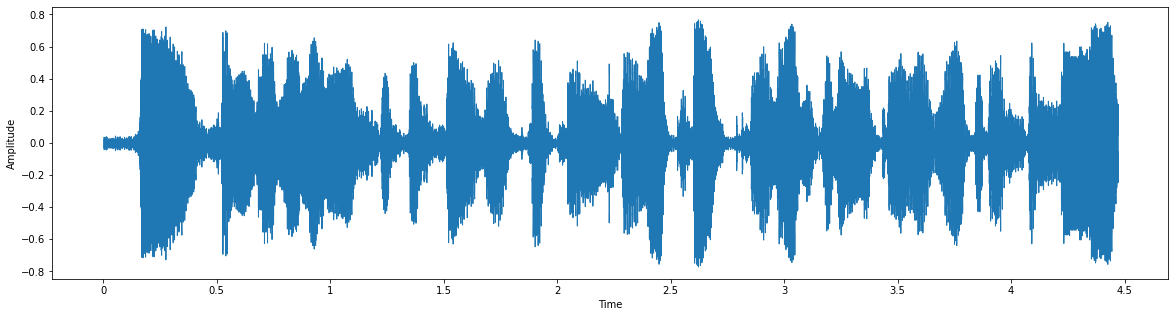

In [32]:
#plot our sample wav file 
%matplotlib inline
import librosa.display
#Plot the signal:
plt.figure(figsize=(20, 5))
plt.xlabel("Time")
plt.ylabel('Amplitude')
librosa.display.waveshow(samples, sr=sample_rate)

In [33]:
from numpy.lib.stride_tricks import as_strided
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """
    Compute the spectrogram for a real signal.
    The parameters follow the naming convention of
    matplotlib.mlab.specgram

    Args:
        samples (1D array): input audio signal
        fft_length (int): number of elements in fft window
        sample_rate (scalar): sample rate
        hop_length (int): hop length (relative offset between neighboring
            fft windows).

    Returns:
        x (2D array): spectrogram [frequency x time]
        freq (1D array): frequency of each row in x

    Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

In [34]:
spe_samples,frequency=spectrogram(samples)

In [35]:
frequency

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [39]:
spe_samples

array([[2.57583396e-02, 5.47593073e-02, 1.17133195e-03, ...,
        7.44152798e-04, 1.24181037e-02, 3.40119218e-03],
       [3.81204461e-02, 5.29784953e-02, 1.59617558e-02, ...,
        8.65728303e-01, 6.68649429e-01, 5.21893056e-01],
       [2.63477010e-03, 2.54267184e-03, 1.37907431e-03, ...,
        2.51085379e+00, 2.15201898e+00, 1.71372746e+00],
       ...,
       [5.79528303e-16, 2.74945869e-17, 1.71945946e-16, ...,
        8.33108602e-13, 4.03570832e-15, 2.34148574e-14],
       [5.34042966e-16, 7.41477164e-18, 1.01421477e-16, ...,
        1.08761308e-12, 1.30579179e-14, 3.48268347e-14],
       [2.91071687e-16, 2.19588241e-18, 1.62366890e-17, ...,
        3.71848498e-13, 1.21856551e-15, 9.15012171e-15]])

In [40]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_spectrogram_feature(vis_spectrogram_feature):
    # plot the normalized spectrogram
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Spectrogram')
    plt.ylabel('Time')
    plt.xlabel('Frequency')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [36]:
#function that load text file and change it to Dictionary 
def t_loader(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8")as f:
    f.readline()
    for line in f:
          line = line.strip()
          alist = line.split(' ', 1)
          key, values = alist[0], alist[1:]
          str1 = ''.join(str(e) for e in values)
          name_to_text[key] = str1
  #print(values)
  return name_to_text

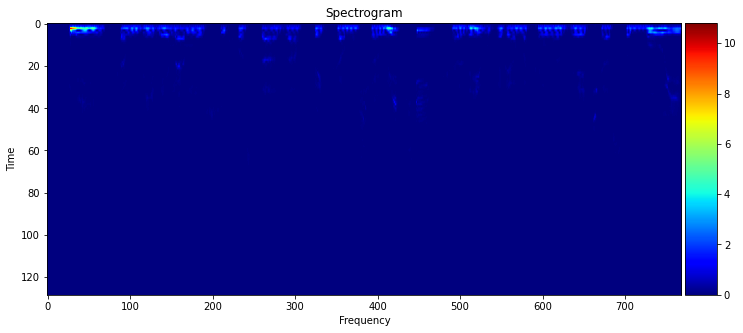

In [41]:
plot_spectrogram_feature(spe_samples)

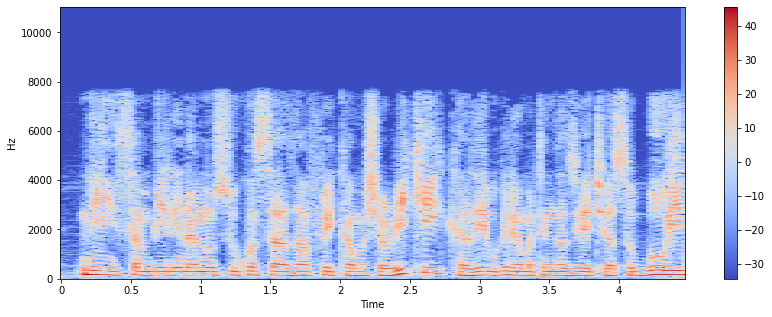

In [43]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [37]:
transcription=t_loader("../data_test/text_train_sw.txt")
transcription

{'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part100\tyanayo': 'andaliwa nami pendo pondo idhaa ya kiswahili',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part101\tinayokutangazia': 'moja kwa moja kutoka jijini dar es salaam tanzania',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part102\tjuma': 'hili bara la afrika limeshuhudia raia wa nchi za niger',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part103\twakipiga': 'kura ya maoni ilikufanya mabadiliko ya',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part104\tkule': 'abidjan raia wa jiji hilo',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part105\twalipata': 'fursa ya kutumia haki yao ya msingi',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part106\twaziri': 'mkuu wa zamani alasane watara',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part107\tna': 'rais aliyetangulia henry ko

In [45]:
"""def meta_data(trans, path ):
  target=[]
  features=[]
  filenames=[]
  duration_of_recordings=[]
  for k in trans:
    filename=path+k +".wav"
    filenames.append(filename)
    audio, fs = librosa.load(filename, sr=None)
    duration_of_recordings.append(float(len(audio)/fs))
   
    lable = trans[k]
    target.append(lable)
  return filenames, target,duration_of_recordings"""

'def meta_data(trans, path ):\n  target=[]\n  features=[]\n  filenames=[]\n  duration_of_recordings=[]\n  for k in trans:\n    filename=path+k +".wav"\n    filenames.append(filename)\n    audio, fs = librosa.load(filename, sr=None)\n    duration_of_recordings.append(float(len(audio)/fs))\n   \n    lable = trans[k]\n    target.append(lable)\n  return filenames, target,duration_of_recordings'

In [44]:
#export data to csv and save as dataS.csv 
"""import csv
with open('../data_test/amharic_train_wav/dataS.csv', 'w') as f:
    for key in transcription.keys():
        f.write("%s,%s\n"%(key,transcription[key]))"""

'import csv\nwith open(\'../data_test/amharic_train_wav/dataS.csv\', \'w\') as f:\n    for key in transcription.keys():\n        f.write("%s,%s\n"%(key,transcription[key]))'

### mono to stereo conversion

In [48]:
cleaning_audios.convert_channels("../data_test/swahili_train_wav/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part2.wav", "../gen_data/SWH-05-20101106_16k2.wav")

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=71520, comptype='NONE', compname='not compressed')
succesffully converted to stereo


### Sampling Rate Standardization

In [51]:
from scipy.io import wavfile as wav

In [55]:
## Read the stereo
fullpath  = '../gen_data/SWH-05-20101106_16k2.wav'

librosa_load, librosa_sampling_rate = librosa.load(fullpath)
scipy_sampling_rate, scipy_load = wav.read(fullpath)

print('original sample rate:',scipy_sampling_rate)
print('converted sample rate:',librosa_sampling_rate)
print('\n')
print('original wav file min~max range:',np.min(scipy_load),'~',np.max(scipy_load))
print('converted wav file min~max range:',np.min(librosa_load),'~',np.max(librosa_load))

original sample rate: 16000
converted sample rate: 22050


original wav file min~max range: -24720 ~ 24457
converted wav file min~max range: -0.7695227 ~ 0.7539317


In [ ]:
file  =('wav/SWH-05-20101106/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav')
librosa_load, librosa_sampling_rate = librosa.load(fullpath)
scipy_sampling_rate, scipy_load = wav.read(fullpath)
print('original sample rate:',scipy_sampling_rate)
print('converted sample rate:',librosa_sampling_rate)
print('\n')
print('original wav file min~max range:',np.min(scipy_load),'~',np.max(scipy_load))
print('converted wav file min~max range:',np.min(librosa_load),'~',np.max(librosa_load))

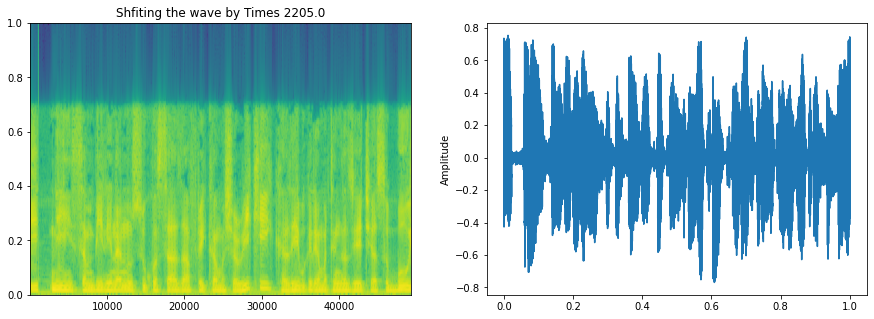

In [46]:
def plot_spec(data:np.array,sr:int) -> None:
  '''
  Function for plotting spectrogram along with amplitude wave graph
  '''
  
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].title.set_text(f'Shfiting the wave by Times {sr/10}')
  ax[0].specgram(data,Fs=2)
  ax[1].set_ylabel('Amplitude')
  ax[1].plot(np.linspace(0,1,len(data)), data)

wav_roll = np.roll(samples,int(sample_rate/10))
plot_spec(data=wav_roll,sr=sample_rate)
ipd.Audio(wav_roll,rate=sample_rate)

In [ ]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

### to stereo convrsion

### Standardizing

In [ ]:
amharic_recordings = cleaning_audios.load_audios('amharic',files=amharic_data.key.to_list()[0:NO_OBSERVATIOINS])

In [ ]:
rates = []
for recording in amharic_recordings:
    _,rate,_ = recording
    rates.append(rate)
amharic_data_df['rate'] = rates